In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [230]:
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

ap_2010 = pd.read_csv('schools/ap_2010.csv')
class_size = pd.read_csv('schools/class_size.csv')
demographics = pd.read_csv('schools/demographics.csv')
graduation = pd.read_csv('schools/graduation.csv')
hs_directory = pd.read_csv('schools/hs_directory.csv')
sat_results = pd.read_csv('schools/sat_results.csv')

data = {
   "ap_2010": ap_2010,
   "class_size": class_size,
   "demographics": demographics,
   "graduation": graduation,
   "hs_directory": hs_directory,
   "sat_results": sat_results
}

We'll read each file into a pandas DataFrame and then store all of the DataFrames in a dictionary. This provides a convenient way to store them and a quick way to reference them later on.

In [232]:
print(data["sat_results"].head())

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers SAT Critical Reading Avg. Score SAT Math Avg. Score  \
0                     29                             355                 404   
1                     91                             383                 423   
2                     70                             377                 402   
3                      7                             414                 401   
4                     44                             390                 433   

  SAT Writing Avg. Score  
0                    363  
1                    366  
2                    370  
3                    359  
4                    38

In [233]:
for key in data:
    print(data[key].head())

      DBN                             SchoolName  AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0   
1  01M450                 EAST SIDE COMMUNITY HS             19.0   
2  01M515                    LOWER EASTSIDE PREP             24.0   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0   
4  02M296  High School of Hospitality Management              NaN   

   Total Exams Taken  Number of Exams with scores 3 4 or 5  
0               49.0                                  10.0  
1               21.0                                   NaN  
2               26.0                                  24.0  
3              377.0                                 191.0  
4                NaN                                   NaN  
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K     

In [234]:
all_survey = pd.read_csv('schools/survey_all.txt', delimiter="\t", encoding="windows-1252")

d75_survey = pd.read_csv('schools/survey_d75.txt', delimiter="\t",
                         
encoding="windows-1252")

survey = pd.concat([all_survey, d75_survey], axis=0)

survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [235]:
survey = survey.copy()

survey['DBN'] = survey['dbn'].copy()

survey = survey.loc[:, ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]]

data['survey'] = survey

In [236]:
data['hs_directory']['DBN'] = data['hs_directory']['dbn'].copy()

def pad_csd(num):
    num_str = str(num)
    num_len = len(num_str)
    if num_len == 2:
        return num_str
    else:
        return num_str.zfill(2)

data['class_size']['padded_csd'] = data['class_size']['CSD'].apply(pad_csd)

data['class_size']['DBN'] = data['class_size']['padded_csd'] + data['class_size']['SCHOOL CODE']

print(data['class_size'].head())

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED   
3    1       M        M015  P.S. 015 Roberto Clemente     01          CTT   
4    1       M        M015  P.S. 015 Roberto Clemente     02       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   
1                                    -                                   -   
2                                    -                                   -   
3                                    -                                   -   
4                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \


### Calculating Total SAT Score  

In this step, we convert the SAT section scores into numeric values to ensure proper calculations. Any invalid values are coerced into `NaN`. After conversion, we compute the total SAT score (`sat_score`) by summing up the three individual section scores:  

- **SAT Math Average Score**  
- **SAT Critical Reading Average Score**  
- **SAT Writing Average Score**  

This newly created `sat_score` column will be used for further analysis.  


In [238]:
data['sat_results']['SAT Math Avg. Score'] = pd.to_numeric(data['sat_results']['SAT Math Avg. Score'], errors='coerce')

data['sat_results']['SAT Critical Reading Avg. Score'] = pd.to_numeric(data['sat_results']['SAT Critical Reading Avg. Score'], errors='coerce')

data['sat_results']['SAT Writing Avg. Score'] = pd.to_numeric(data['sat_results']['SAT Writing Avg. Score'], errors='coerce')

data['sat_results']['sat_score'] = data['sat_results']['SAT Math Avg. Score'] + data['sat_results']['SAT Critical Reading Avg. Score'] + data['sat_results']['SAT Writing Avg. Score'] 

In [239]:
import re

def coord_find(location):
    coords = re.findall(r"\(.+\)", location)
    coords_str = coords[0].replace("(", "").replace(")", "")
    latitude, longitude = coords_str.split(",")
    latitude = float(latitude.strip())
    return latitude
    
data['hs_directory']['lat'] = data['hs_directory']['Location 1'].apply(coord_find)

print(data['hs_directory'].head())

      dbn                                        school_name    borough  \
0  27Q260          Frederick Douglass Academy VI High School     Queens   
1  21K559        Life Academy High School for Film and Music   Brooklyn   
2  16K393     Frederick Douglass Academy IV Secondary School   Brooklyn   
3  08X305                               Pablo Neruda Academy      Bronx   
4  03M485  Fiorello H. LaGuardia High School of Music & A...  Manhattan   

  building_code  phone_number    fax_number  grade_span_min  grade_span_max  \
0          Q465  718-471-2154  718-471-2890             9.0              12   
1          K400  718-333-7750  718-333-7775             9.0              12   
2          K026  718-574-2820  718-574-2821             9.0              12   
3          X450  718-824-1682  718-824-1663             9.0              12   
4          M485  212-496-0700  212-724-5748             9.0              12   

   expgrade_span_min  expgrade_span_max  ... priority10  \
0              

In [240]:
def coord_find(location):
    coords = re.findall(r"\(.+\)", location)
    coords_str = coords[0].replace("(", "").replace(")", "")
    latitude, longitude = coords_str.split(",")
    longitude = float(longitude.strip())
    return longitude
    
data['hs_directory']['lon'] = data['hs_directory']['Location 1'].apply(coord_find)

data['hs_directory']['lat'] = pd.to_numeric(data['hs_directory']['lat'], errors="coerce")

data['hs_directory']['lon'] = pd.to_numeric(data['hs_directory']['lat'],
errors="coerce")  

print(data['hs_directory'].head())

      dbn                                        school_name    borough  \
0  27Q260          Frederick Douglass Academy VI High School     Queens   
1  21K559        Life Academy High School for Film and Music   Brooklyn   
2  16K393     Frederick Douglass Academy IV Secondary School   Brooklyn   
3  08X305                               Pablo Neruda Academy      Bronx   
4  03M485  Fiorello H. LaGuardia High School of Music & A...  Manhattan   

  building_code  phone_number    fax_number  grade_span_min  grade_span_max  \
0          Q465  718-471-2154  718-471-2890             9.0              12   
1          K400  718-333-7750  718-333-7775             9.0              12   
2          K026  718-574-2820  718-574-2821             9.0              12   
3          X450  718-824-1682  718-824-1663             9.0              12   
4          M485  212-496-0700  212-724-5748             9.0              12   

   expgrade_span_min  expgrade_span_max  ...  \
0                NaN      

In [241]:
class_size = data['class_size']
class_size = class_size[class_size['GRADE '].str.contains("09-12", na=False)]
class_size = class_size[class_size['PROGRAM TYPE'].str.contains("GEN ED", na=False)] 
print(class_size.head())

     CSD BOROUGH SCHOOL CODE                                    SCHOOL NAME  \
225    1       M        M292  Henry Street School for International Studies   
226    1       M        M292  Henry Street School for International Studies   
227    1       M        M292  Henry Street School for International Studies   
228    1       M        M292  Henry Street School for International Studies   
229    1       M        M292  Henry Street School for International Studies   

    GRADE  PROGRAM TYPE CORE SUBJECT (MS CORE and 9-12 ONLY)  \
225  09-12       GEN ED                              ENGLISH   
226  09-12       GEN ED                              ENGLISH   
227  09-12       GEN ED                              ENGLISH   
228  09-12       GEN ED                              ENGLISH   
229  09-12       GEN ED                                 MATH   

    CORE COURSE (MS CORE and 9-12 ONLY) SERVICE CATEGORY(K-9* ONLY)  \
225                           English 9                           -  

### Aggregating Values by DBN  

Each school has a unique **DBN (District Borough Number)**, which serves as an identifier. To standardize the dataset, we group the `class_size` DataFrame by DBN and compute the average of all numeric columns. After aggregation, we reset the index and store the processed DataFrame back into the `data` dictionary for further analysis.  


In [243]:
class_size = class_size.groupby('DBN').agg('mean', numeric_only=True)
class_size.reset_index(inplace=True)
data['class_size'] = class_size
print(data['class_size'].head())

      DBN  CSD  NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
0  01M292  1.0                            88.0000            4.000000   
1  01M332  1.0                            46.0000            2.000000   
2  01M378  1.0                            33.0000            1.000000   
3  01M448  1.0                           105.6875            4.750000   
4  01M450  1.0                            57.6000            2.733333   

   AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  SIZE OF LARGEST CLASS  \
0           22.564286                   18.50              26.571429   
1           22.000000                   21.00              23.500000   
2           33.000000                   33.00              33.000000   
3           22.231250                   18.25              27.062500   
4           21.200000                   19.40              22.866667   

   SCHOOLWIDE PUPIL-TEACHER RATIO  
0                             NaN  
1                             NaN  
2                   

In [244]:
demographics = data['demographics']
demographics = demographics[demographics['schoolyear'] == 20112012]
data['demographics'] = demographics
print(data['demographics'].head())

       DBN                                              Name  schoolyear  \
6   01M015  P.S. 015 ROBERTO CLEMENTE                           20112012   
13  01M019  P.S. 019 ASHER LEVY                                 20112012   
20  01M020  PS 020 ANNA SILVER                                  20112012   
27  01M034  PS 034 FRANKLIN D ROOSEVELT                         20112012   
35  01M063  PS 063 WILLIAM MCKINLEY                             20112012   

   fl_percent  frl_percent  total_enrollment prek    k grade1 grade2  ...  \
6         NaN         89.4               189   13   31     35     28  ...   
13        NaN         61.5               328   32   46     52     54  ...   
20        NaN         92.5               626   52  102    121     87  ...   
27        NaN         99.7               401   14   34     38     36  ...   
35        NaN         78.9               176   18   20     30     21  ...   

   black_num black_per hispanic_num hispanic_per white_num white_per male_num  \

In [245]:
graduation = data['graduation']
graduation = graduation[graduation['Cohort'] == '2006']
graduation = graduation[graduation['Demographic'] == 'Total Cohort']

data['graduation'] = graduation

print(data['graduation'].head())

     Demographic     DBN                            School Name Cohort  \
3   Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL   2006   
10  Total Cohort  01M448    UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   2006   
17  Total Cohort  01M450             EAST SIDE COMMUNITY SCHOOL   2006   
24  Total Cohort  01M509                MARTA VALLE HIGH SCHOOL   2006   
31  Total Cohort  01M515  LOWER EAST SIDE PREPARATORY HIGH SCHO   2006   

    Total Cohort Total Grads - n Total Grads - % of cohort Total Regents - n  \
3             78              43                     55.1%                36   
10           124              53                     42.7%                42   
17            90              70                     77.8%                67   
24            84              47                       56%                40   
31           193             105                     54.4%                91   

   Total Regents - % of cohort Total Regents - % of grads  ...  \
3       

In [246]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

data['ap_2010']['AP Test Takers '] = pd.to_numeric(data['ap_2010']['AP Test Takers '], errors="coerce")
data['ap_2010']['Total Exams Taken'] = pd.to_numeric(data['ap_2010']['Total Exams Taken'], errors="coerce")
data['ap_2010']['Number of Exams with scores 3 4 or 5'] = pd.to_numeric(data['ap_2010']['Number of Exams with scores 3 4 or 5'], errors="coerce")

print(data['ap_2010'].dtypes)

DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object


### Merging Data Tables  

To create a comprehensive dataset, we merge multiple tables based on the **DBN (District Borough Number)**, which serves as a unique school identifier. We start with the `sat_results` dataset and perform left joins with:  

- **`ap_2010`** – Contains Advanced Placement (AP) exam data  
- **`graduation`** – Contains graduation rates  

Using a left join ensures that all schools in the `sat_results` dataset are retained, even if corresponding AP or graduation data is missing. Finally, we print the first few rows and the shape of the merged dataset to inspect the results.  


In [248]:
combined = data["sat_results"]

combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")

print(combined.head())
print(combined.shape)

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                      7                            414.0   
4                     44                            390.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3                401.0      

### Merging Additional Datasets  

To enrich our analysis, we merge several additional datasets with the `combined` DataFrame using **inner joins** on **DBN (District Borough Number)**. The following datasets are merged:  

- **`class_size`** – Contains information on class sizes  
- **`demographics`** – Includes demographic details of students  
- **`survey`** – Contains survey responses from students, teachers, and parents  
- **`hs_directory`** – Provides high school directory information  

Using an **inner join** ensures that only schools present in all datasets are retained. Finally, we print the first few rows and the shape of the resulting dataset to verify the merge.  


In [250]:
to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

print(combined.head())
print(combined.shape)


      DBN                                        SCHOOL NAME  \
0  01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                         EAST SIDE COMMUNITY SCHOOL   
3  01M509                            MARTA VALLE HIGH SCHOOL   
4  01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                     44                            390.0   
4                    159                            522.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3   

In [251]:
means = combined.mean(numeric_only=True)
combined = combined.fillna(means)  
pd.set_option('future.no_silent_downcasting', True)  

combined = combined.fillna(0).infer_objects(copy=False)

In [252]:
combined = combined.assign(school_dist=combined["DBN"].str[:2])

In [272]:
correlations = combined.corr(numeric_only=True)
correlations = correlations["sat_score"]

print(correlations)

SAT Critical Reading Avg. Score    0.986820
SAT Math Avg. Score                0.972643
SAT Writing Avg. Score             0.987771
sat_score                          1.000000
AP Test Takers                     0.523140
                                     ...   
Census Tract                       0.048737
BIN                                0.052232
BBL                                0.044427
lat                               -0.121029
lon                               -0.121029
Name: sat_score, Length: 74, dtype: float64


To identify relationships between different variables and **SAT scores**, we compute the **correlation matrix** for all numeric columns in the dataset. We then extract the correlation values specifically for the `sat_score` column.  

In [278]:
survey = survey.copy()

survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey = survey[survey_fields]
data["survey"] = survey

In [280]:
survey_fields.remove("DBN")

<Axes: >

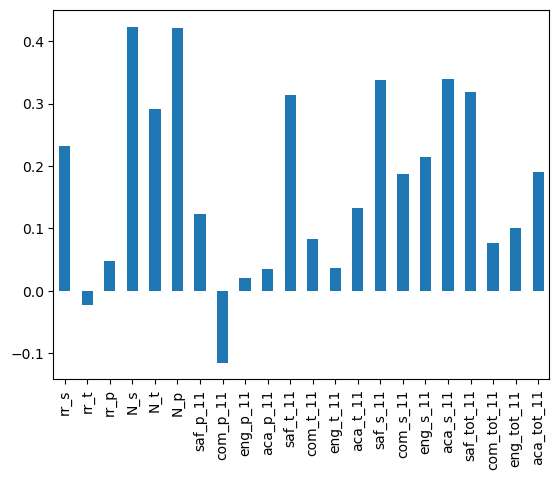

In [282]:
%matplotlib inline
combined.corr(numeric_only=True)["sat_score"][survey_fields].plot.bar()

### Key Correlations with SAT Scores  

The bar chart reveals several notable correlations between survey responses and SAT scores.  

- **High correlations** between `N_s`, `N_t`, `N_p`, and `sat_score` make sense since these variables are related to total enrollment which itself has some correlation with SAT scores.  
- **Student Response Rate** (`rr_s`) shows a moderate positive correlation with SAT scores. This could indicate that students who are more engaged (e.g., willing to complete surveys) may also be more academically inclined.  
- **Perceived Safety** (`saf_t_11` and `saf_s_11`) correlates positively with SAT scores, which is logical—learning is more effective in a safe environment.  
- **Student Perception of Academic Standards** (`aca_s_11`) correlates with SAT scores, whereas teacher (`aca_t_11`) and parent (`aca_p_11`) perceptions do not. This suggests that students' own assessment of academic rigor may be a stronger predictor of performance.  

These insights highlight the importance of student engagement, school safety, and perceived academic challenge in influencing SAT performance.  


<Axes: xlabel='saf_s_11', ylabel='sat_score'>

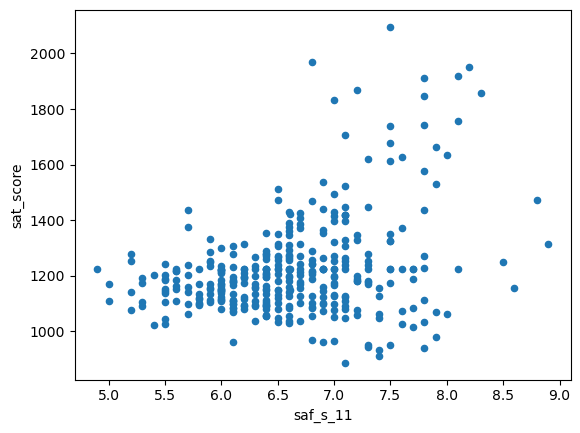

In [285]:
combined.plot.scatter("saf_s_11", "sat_score")

### Relationship Between Perceived Safety and SAT Scores  

The scatter plot suggests a positive correlation between student-perceived safety (`saf_s_11` and SAT scores though the correlation is not particularly strong. Key observations include:  

- Schools with higher safety scores tend to have higher SAT scores, with a few outliers showing extremely high SAT scores.  
- Schools with lower safety scores generally have lower SAT scores.  
- Notably, no school with a safety score below 6.5 has an average SAT score exceeding 1500, suggesting that a minimum level of safety might be necessary for strong academic performance.  

While this does not imply causation, it aligns with the idea that a safe learning environment may contribute to better student outcomes.  


### Analyzing the Relationship Between SAT Scores and Total Enrollment  

From the scatter plot, there doesn’t appear to be a strong correlation between **SAT scores** and **total enrollment**. If a strong correlation existed, we would expect the points to form a clear linear pattern. Instead, we observe:  

- A **large central cluster** of schools with varying SAT scores and enrollments.  
- A **few outliers** diverging in different directions, reducing the overall correlation.  
- A **notable cluster in the bottom-left**, where both **total enrollment** and **SAT scores** are low.  

This low-enrollment, low-SAT-score cluster may be influencing the correlation value. It’s worth extracting the names of these schools for further investigation.  


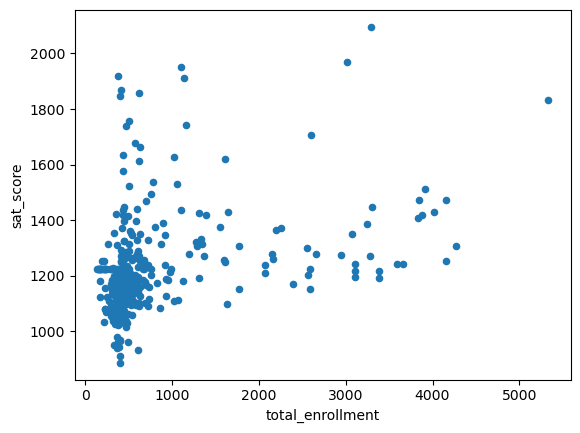

In [196]:
combined.plot.scatter(x="total_enrollment", y="sat_score")
plt.show()

In [198]:
low_enrollment = combined[combined["total_enrollment"] < 1000]
low_enrollment = low_enrollment[low_enrollment["sat_score"] < 1000]
print(low_enrollment["School Name"])

91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                        0
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object


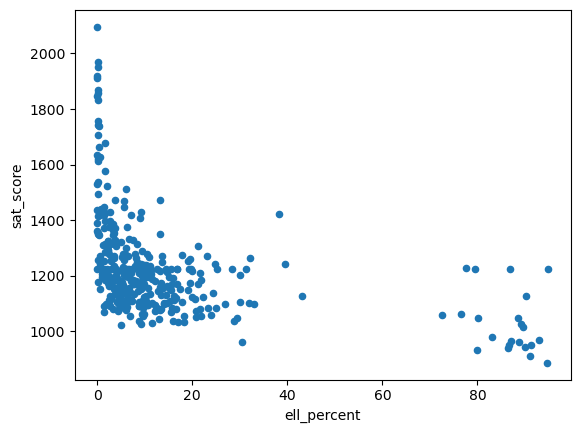

In [224]:
combined.plot.scatter(x='ell_percent', y='sat_score')
plt.show()

### Exploring the Negative Correlation Between `ell_percent` and SAT Scores  

The variable **`ell_percent`** (percentage of English Language Learners) shows a **strong negative correlation** with **SAT scores**. This suggests that schools with a higher proportion of English Language Learners tend to have lower SAT scores.  

Possible reasons for this relationship include:  

- **Language Barrier** – The SAT is heavily language-dependent, which may disadvantage students still developing English proficiency.  
- **Academic Challenges** – English Language Learners may require additional support in coursework, affecting standardized test performance. 
- **Socioeconomic Factors** – Schools with a high percentage of ELL students might have fewer academic resources, further impacting scores.  

This insight highlights the need for targeted interventions to support English Language Learners in SAT preparation.  

In [226]:
districts = combined.groupby("school_dist").agg('mean', numeric_only=True)
districts.reset_index(inplace=True)

print(districts.head())

  school_dist  SAT Critical Reading Avg. Score  SAT Math Avg. Score  \
0          01                       441.833333           473.333333   
1          02                       426.619092           444.186256   
2          03                       428.529851           437.997512   
3          04                       402.142857           416.285714   
4          05                       427.159915           438.236674   

   SAT Writing Avg. Score    sat_score  AP Test Takers   Total Exams Taken  \
0              439.333333  1354.500000       116.681090         173.019231   
1              424.832836  1295.638184       128.908454         201.516827   
2              426.915672  1293.443035       156.183494         244.522436   
3              405.714286  1224.142857       129.016484         183.879121   
4              419.666098  1285.062687        85.722527         115.725275   

   Number of Exams with scores 3 4 or 5  Total Cohort  CSD  ...  priority08  \
0                        

<Axes: >

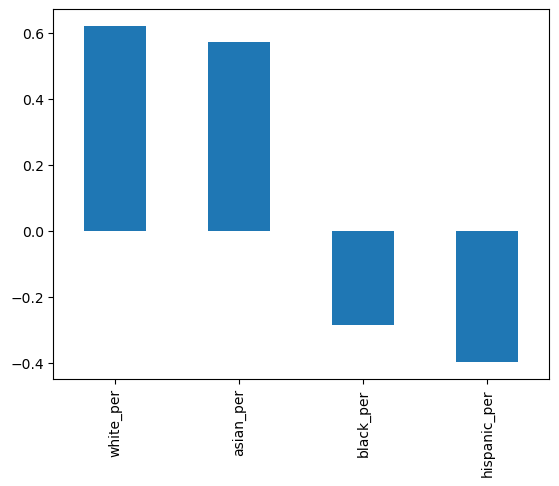

In [300]:
race_fields = ["white_per", "asian_per", "black_per", "hispanic_per"]
combined.corr(numeric_only=True)["sat_score"][race_fields].plot.bar()

### Correlation Between Racial Demographics and SAT Scores  

The bar chart indicates a relationship between racial demographics and SAT scores:  

- A higher percentage of White (`white_per`) or Asian (`asian_per`) students correlates positively with SAT scores.  
- A higher percentage of Black (`black_per`) or Hispanic (`hispanic_per`) students correlates negatively with SAT scores.  

This pattern may reflect systemic disparities in education, such as:  

- **School Funding Differences** – Schools with more Black and Hispanic students may receive less funding, affecting resources, teacher quality, and student outcomes.  
- **Access to Advanced Coursework** – Schools in underfunded areas may offer fewer AP or honors courses, limiting SAT preparation.  
- **Socioeconomic Factors** – Economic disparities can impact academic performance, including access to tutoring, test prep, and stable learning environments.  

These correlations highlight the importance of addressing educational inequalities to ensure all students have the support needed for academic success.  


<Axes: xlabel='hispanic_per', ylabel='sat_score'>

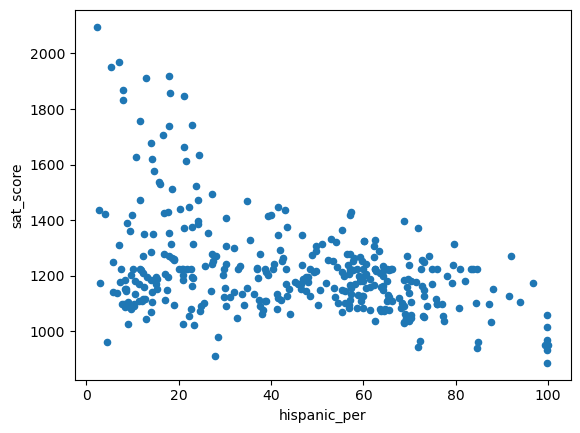

In [303]:
combined.plot.scatter("hispanic_per", "sat_score")

In [307]:
print(combined[combined["hispanic_per"] > 95]["SCHOOL NAME"])

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


The schools identified in the analysis primarily serve recent immigrants to the U.S. A key factor influencing their lower SAT scores is the high proportion of students learning English. 

In [313]:
print(combined[(combined["hispanic_per"] < 10) & (combined["sat_score"] > 1800)]["SCHOOL NAME"])

37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


<Axes: xlabel='female_per', ylabel='sat_score'>

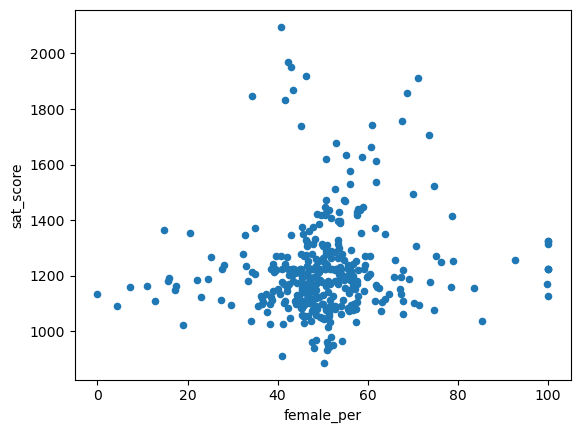

In [315]:
combined.plot.scatter("female_per", "sat_score")

There is no strong correlation between `sat_score` and `female_per`. However, a cluster of schools with 60% to 80% female students shows higher SAT scores, suggesting that certain female-dominated schools may perform better academically.  

In [319]:
print(combined[(combined["female_per"] > 60) & (combined["sat_score"] > 1700)]["SCHOOL NAME"])

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


The schools with 60% to 80% female students and high SAT scores appear to be selective liberal arts schools with high academic standards.

<Axes: xlabel='ap_per', ylabel='sat_score'>

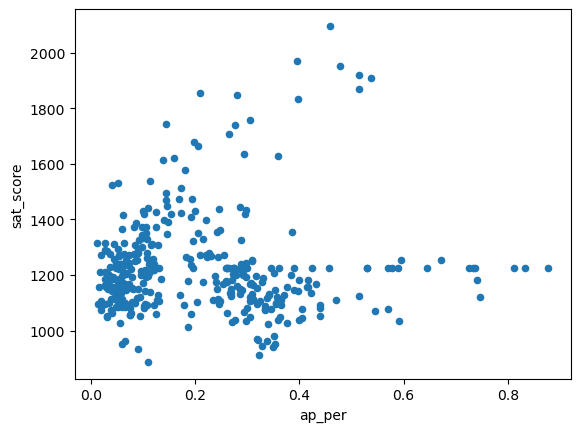

In [323]:
combined["ap_per"] = combined["AP Test Takers "] / combined["total_enrollment"]
combined = combined.copy()
combined.plot.scatter(x='ap_per', y='sat_score')

There is a relationship between the percentage of students taking the **AP exam** and **SAT scores**, but the correlation is not very strong.  